# K-Means Clustering

https://docs.google.com/presentation/d/1u3DRpxpwUeX175JInDgS8D0jgSz1-dpmm_ml3VTrd5E/edit?usp=sharing

### Intuition

Step1: 클러스터 수 결정하기(K개)  
Step2: 랜덤한 K개의 centroid 정하기  
Step3: 각 데이터를 가장 가까운 centroid에 할당하여 K개의 클러스터 생성하기  
Step4: 각의 클러스터의 중심을 새로운 centroid로 설정하기  
Step5: 각 데이터를 새로운 centroid에 할당하기  
Step6: 할당된 centroid가 변경된 데이터가 있는가? (변경되었으면 Step4, 변경 없으면 끝)

#### Number of Clusters
WCSS (Within-Cluster Sums of Squares)  
Elbow Method

#### Disadvantage
Random Initialization Trap: In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

##### Solution: K-Means++
Step1: 랜덤한 initial point C_1을 임의로 선택  
Step2: C_t를 C_(t-1)와 거리가 먼 곳을 선택  
Step3: K개의 Initial point를 선택할 때 까지 step2 반복


reference. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Example
Customer information

### Step1: Load Dataset

In [2]:
# 'Customers.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv("Customers.csv")
df.shape

(200, 5)

In [3]:
# df head 행 보기

df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# column별로 unique 종류 수 확인

df.nunique()

CustomerID       200
Gender             2
Age               51
AnnualIncome      64
SpendingScore     84
dtype: int64

In [5]:
# set index as 'CustomerID'

df.set_index('CustomerID', inplace=True)

In [6]:
# df descriptive statistics

df.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Step2: Visualize Dataset

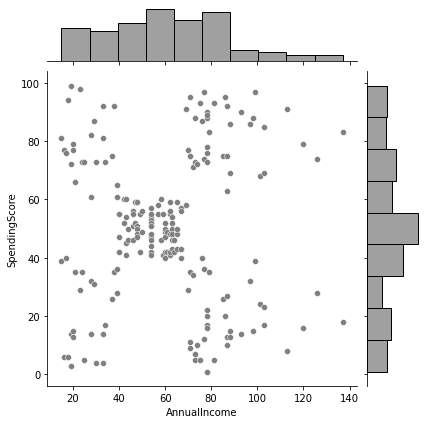

In [7]:
# sns.jointplot 활용한 시각화. x='AnnualIncome', y='SpendingScore'

sns.jointplot(x='AnnualIncome', y='SpendingScore', data = df, color = 'gray')

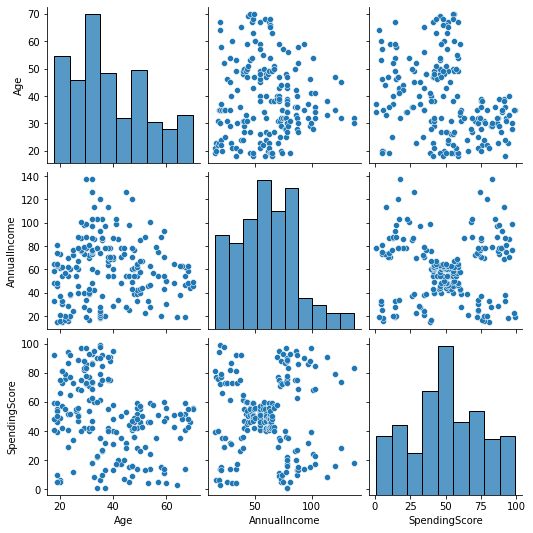

In [8]:
# sns.pairplot()

sns.pairplot(df)

### Step3: Find Optimal # of Clusters

In [14]:
# X에 -1번째 column까지 할당 np.array

X = df.iloc[:, 2:].values

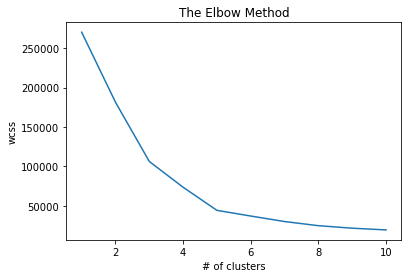

In [15]:
# find cluster number in KMeans 

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show()

### Step4: Train Model

In [16]:
# kmeans에 KMeans() 모형 학습. with n_cluster=5 (Elbow Model을 보고 넣어보면서 유의미한 값을 찾는다), init='k-means++'
# y_kmeans에 predict 값 저장

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

In [17]:
# y_kmeans 확인

y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [18]:
# cluster_centers 확인

kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

### Step5: Analyze Result

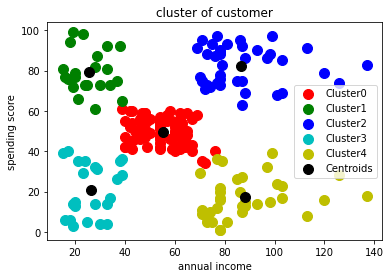

In [19]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='r', label='Cluster0')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='g', label='Cluster1')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='b', label='Cluster2')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='c', label='Cluster3')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='y', label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('cluster of customer')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()


In [20]:
# 예측해보기

predict_X = [[100, 60], [100, 40]]
kmeans.predict(predict_X)

array([2, 4])

---

## Exercise

League of Legends character stats

reference. https://developer.riotgames.com/docs/lol#data-dragon_champions

### Step1: Load Dataset

In [21]:
# import requests
# url = 'http://ddragon.leagueoflegends.com/cdn/10.24.1/data/en_US/champion.json'
# requests.get 으로 값 불러오기

import requests

url = 'http://ddragon.leagueoflegends.com/cdn/10.24.1/data/en_US/champion.json'
resp = requests.get(url)
resp

<Response [200]>

In [22]:
# json 추출

resp_json = resp.json()
resp_json.keys()

dict_keys(['type', 'format', 'version', 'data'])

In [23]:
resp_json['data'].keys() #캐릭터 이름

dict_keys(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Renekton', 'Rengar', '

In [25]:
resp_json['data']['Aatrox']['stats']

{'hp': 580,
 'hpperlevel': 90,
 'mp': 0,
 'mpperlevel': 0,
 'movespeed': 345,
 'armor': 38,
 'armorperlevel': 3.25,
 'spellblock': 32.1,
 'spellblockperlevel': 1.25,
 'attackrange': 175,
 'hpregen': 3,
 'hpregenperlevel': 1,
 'mpregen': 0,
 'mpregenperlevel': 0,
 'crit': 0,
 'critperlevel': 0,
 'attackdamage': 60,
 'attackdamageperlevel': 5,
 'attackspeedperlevel': 2.5,
 'attackspeed': 0.651}

In [26]:
# 챔피언별로 data 파싱

list_stats = []
for k in resp_json['data'].keys():
    dict_stat = resp_json['data'][k]['stats']
    dict_stat['id'] = k
    list_stats.append(dict_stat)

In [27]:
# 챔피언별로 data 파싱

def data_parser(champ):
    dict_stat = resp_json['data'][champ]['stats']
    dict_stat['id'] = champ
    return dict_stat

list_stats = list(map(data_parser, resp_json['data']))

In [28]:
# 파싱된 값 df로 저장.

df = pd.DataFrame(list_stats)
df = df.set_index('id')
df.head()

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
id,,,,,,,,,,,,,,,,,,,,
Aatrox,580.0,90,0.0,0.0,345,38.00,3.25,32.1,1.25,175,3.0,1.00,0.000,0.000,0,0,60.00,5.00,2.500,0.651
Ahri,526.0,92,418.0,25.0,330,20.88,3.50,30.0,0.50,550,5.5,0.60,8.000,0.800,0,0,53.04,3.00,2.000,0.668
Akali,575.0,95,200.0,0.0,345,23.00,3.50,37.0,1.25,125,8.0,0.50,50.000,0.000,0,0,62.40,3.30,3.200,0.625
Alistar,600.0,106,350.0,40.0,330,44.00,3.50,32.1,1.25,125,8.5,0.85,8.500,0.800,0,0,62.00,3.75,2.125,0.625
Amumu,615.0,80,285.0,60.0,335,30.00,3.80,32.1,1.25,125,9.0,0.85,7.382,0.525,0,0,53.38,3.80,2.180,0.736


In [29]:
# 18level 값으로 처리

df['hp_18'] = df['hp'] + 17 * df['hpperlevel']
df['mp_18'] = df['mp'] + 17 * df['mpperlevel']
df['armor_18'] = df['armor'] + 17 * df['armorperlevel']
df['spellblock_18'] = df['spellblock'] + 17 * df['spellblockperlevel']
df['hpregen_18'] = df['hpregen'] + 17 * df['hpregenperlevel']
df['mpregen_18'] = df['mpregen'] + 17 * df['mpregenperlevel']
df['crit_18'] = df['crit'] + 17 * df['critperlevel']
df['attackdamage_18'] = df['attackdamage'] + 17 * df['attackdamageperlevel']
df['attackspeed_18'] = df['attackspeed'] * (1 + df['attackspeedperlevel'] * 17 / 100)
df['attackspeed_18'] = df['attackspeed_18'].apply(lambda x: round(x, 4))

df = df.drop(['hpperlevel', 'mpperlevel', 'armorperlevel', 'spellblockperlevel', 
              'hpregenperlevel', 'mpregenperlevel', 'critperlevel', 
              'attackdamageperlevel', 'attackspeedperlevel'], axis=1)
df = df.drop(['hp', 'mp', 'armor', 'spellblock', 'hpregen', 'mpregen', 
              'crit', 'attackdamage', 'attackspeed'], axis=1)

df.head()

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
id,,,,,,,,,,,
Aatrox,345,175,2110.0,0.0,93.25,53.35,20.00,0.000,0,145.00,0.9277
Ahri,330,550,2090.0,843.0,80.38,38.50,15.70,21.600,0,104.04,0.8951
Akali,345,125,2190.0,200.0,82.50,58.25,16.50,50.000,0,118.50,0.9650
Alistar,330,125,2402.0,1030.0,103.50,53.35,22.95,22.100,0,125.75,0.8508
Amumu,335,125,1975.0,1305.0,94.60,53.35,23.45,16.307,0,117.98,1.0088


### Step2: Visualize Dataset

In [30]:
# 피쳐 셀렉션: 가장 std가 큰 것 기준으로 jointplot 그리기 위한 확인 작업

df.describe().T.sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
mp_18,152.0,941.531447,410.768370,0.000,843.0000,1008.6000,1200.0000,1879.0000
attackrange,152.0,326.677632,195.349020,125.000,125.0000,175.0000,525.0000,650.0000
hp_18,152.0,2070.256579,141.541546,1530.000,2016.0000,2077.0000,2142.2400,2480.0000
attackdamage_18,152.0,114.191126,14.354857,50.000,105.9440,114.0500,121.4025,153.0000
armor_18,152.0,88.672355,10.749716,28.000,81.4700,87.5000,95.6000,115.0000
mpregen_18,152.0,17.763447,9.151381,0.000,14.9810,19.0920,21.6000,50.0000
movespeed,152.0,336.203947,7.603013,315.000,330.0000,335.0000,340.0000,355.0000
spellblock_18,152.0,46.175658,7.589349,30.100,38.5000,49.2500,53.3500,61.7500
hpregen_18,152.0,17.892105,3.747379,11.000,14.8500,16.8000,20.3750,34.2500
attackspeed_18,152.0,0.920183,0.110327,0.625,0.8375,0.9227,1.0053,1.2625


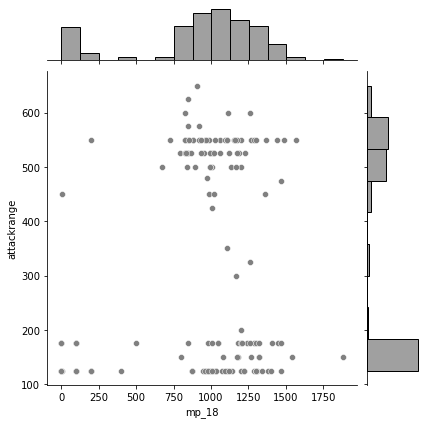

In [31]:
# sns.jointplot 활용한 시각화. x='mp_18', y='attackrange'

sns.jointplot(x='mp_18', y='attackrange', data = df, color = 'gray')

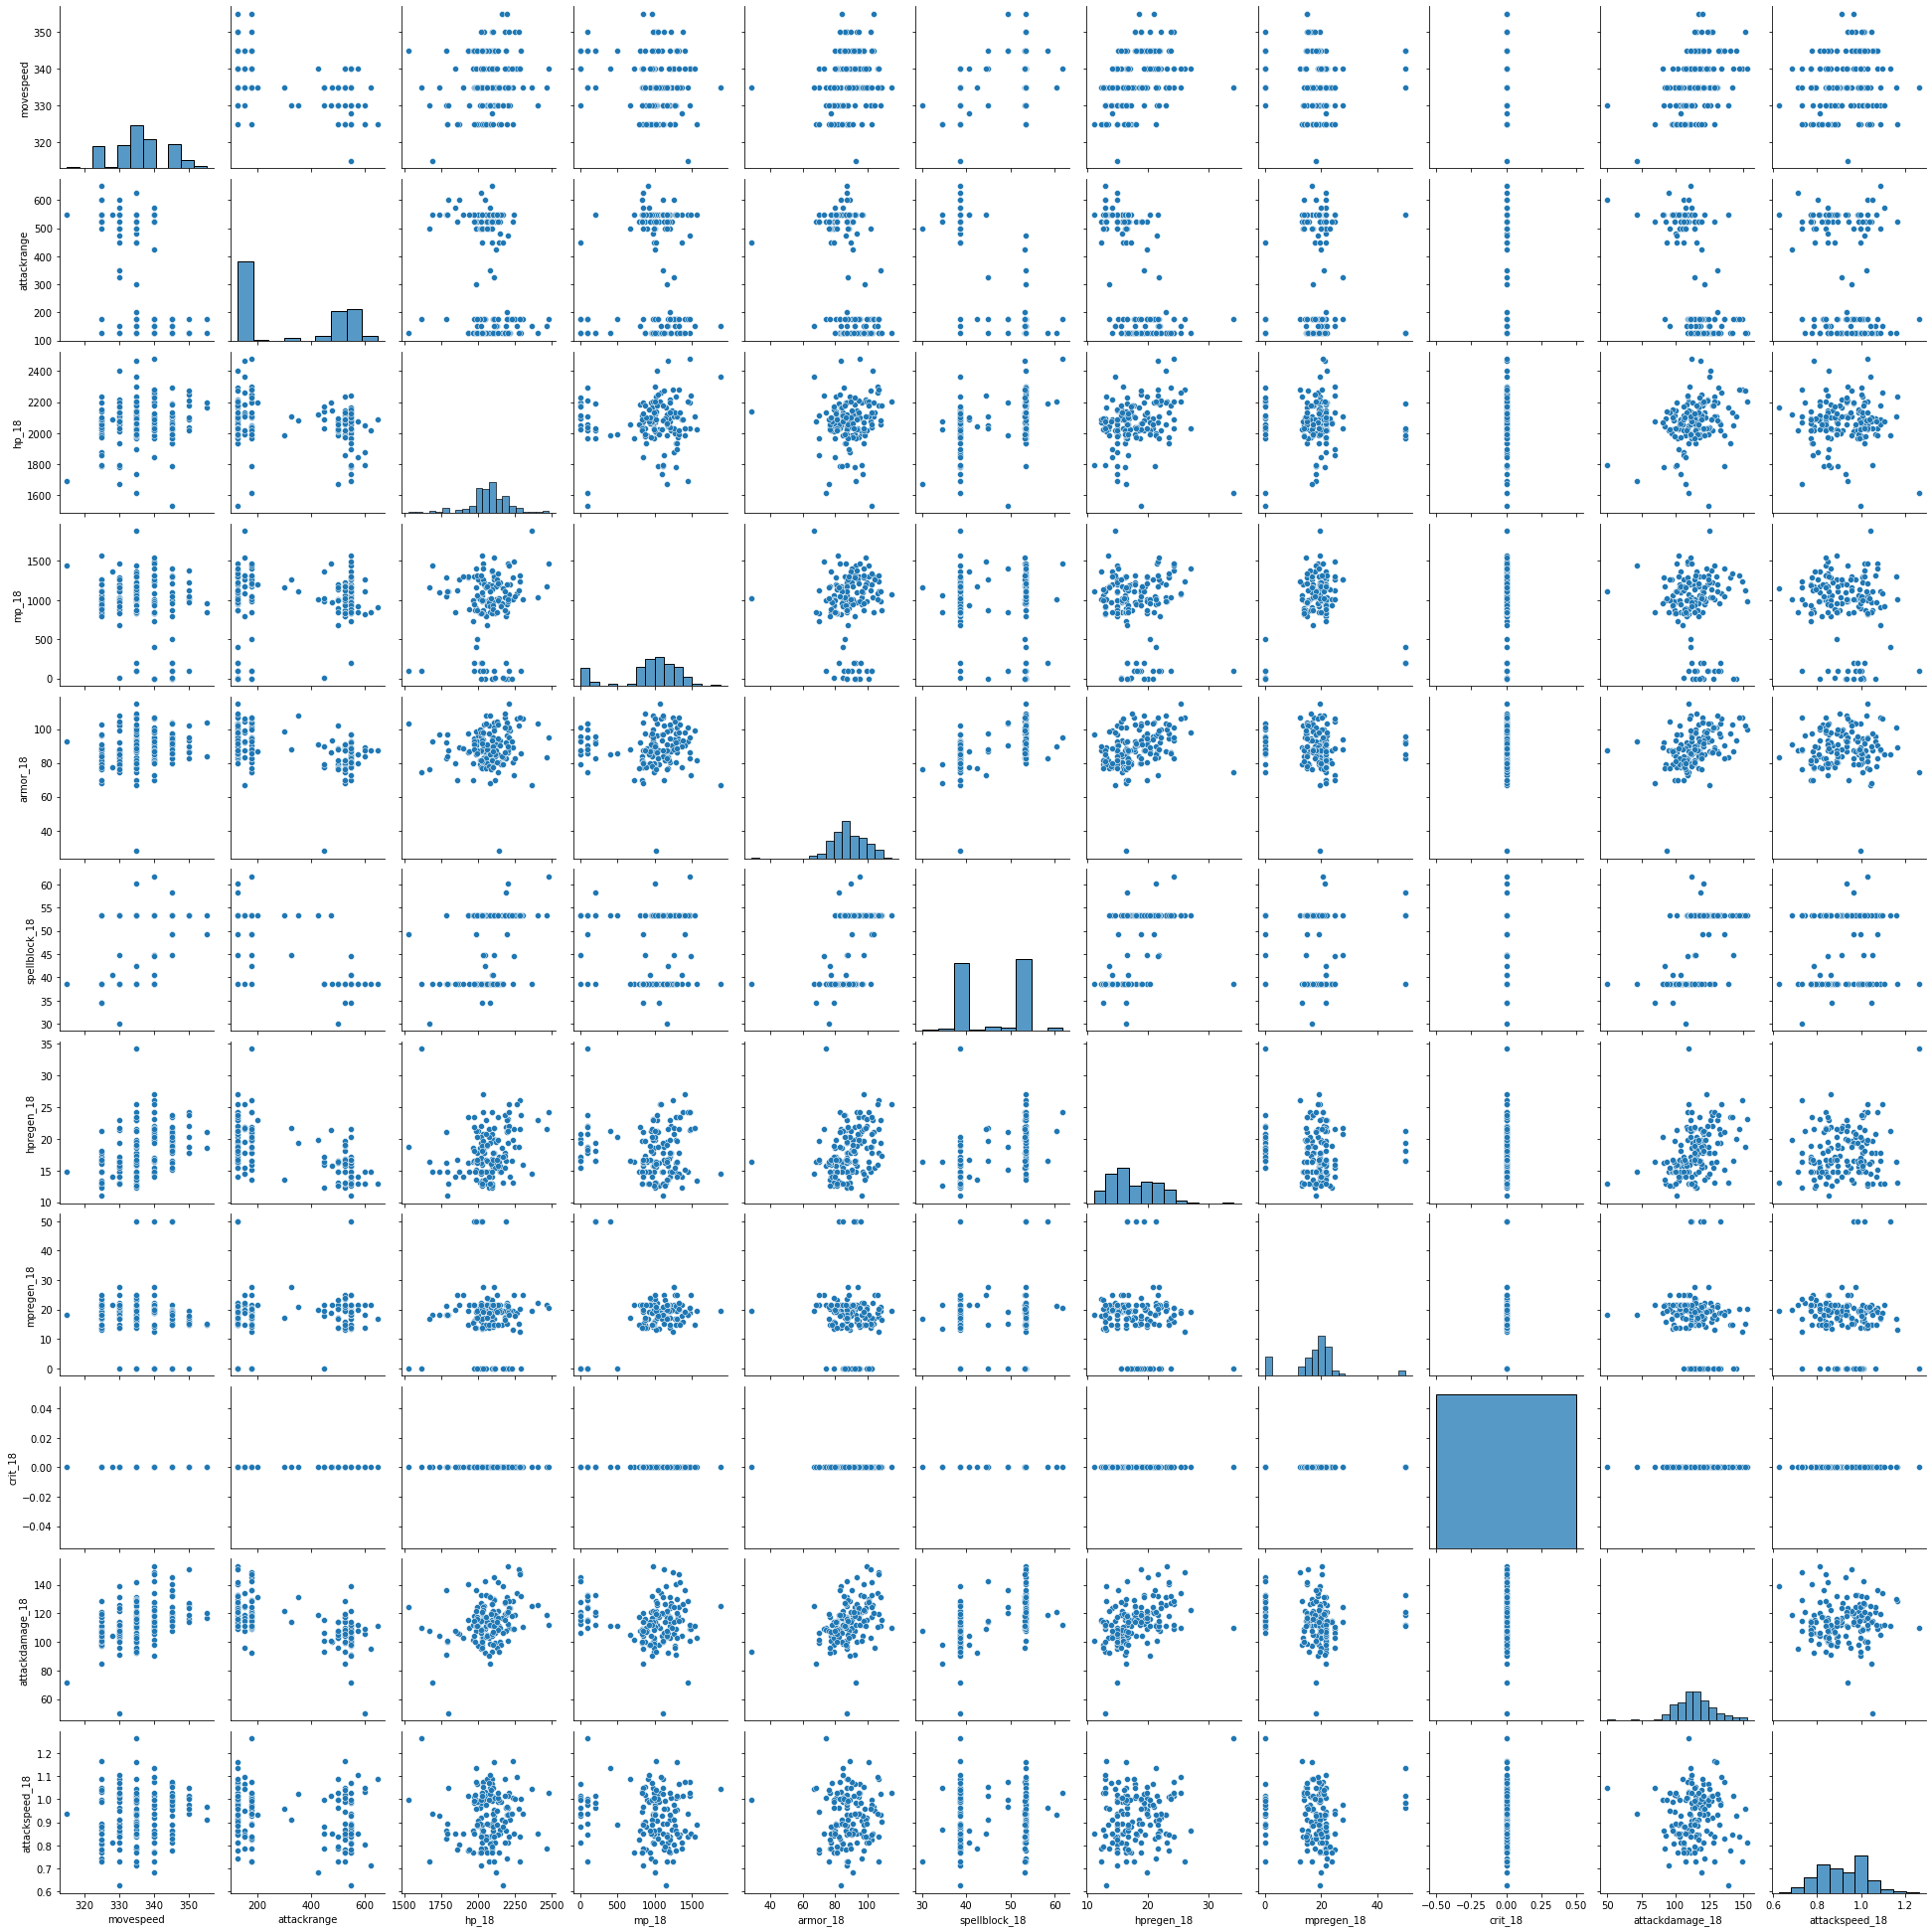

In [24]:
sns.pairplot(df)

### Step3: Find Optimal # of Clusters

In [32]:
# from sklearn.preprocessing import StandardScaler
# sc로 StandardScaler() 스케일러 오브젝트 할당
# 스케일링 할 X_train으로 fit

from sklearn.preprocessing import StandardScaler

X = df
transformer = StandardScaler().fit(X)

In [33]:
# X_pp에 스케일링 결과 저장

X_pp = transformer.transform(X)
X_pp

array([[ 1.16074116, -0.77901106,  0.28171802, ...,  0.        ,
         2.1533285 ,  0.06835999],
       [-0.81868281,  1.14697594,  0.13994964, ...,  0.        ,
        -0.70949389, -0.22810196],
       [ 1.16074116, -1.03580932,  0.84879155, ...,  0.        ,
         0.30116069,  0.40756339],
       ...,
       [-0.15887482,  1.14697594, -1.22102682, ...,  0.        ,
        -0.80734427, -0.62641587],
       [ 0.50093317,  1.14697594,  0.38095589, ...,  0.        ,
        -0.00636906, -0.26902462],
       [ 0.50093317,  1.27537507, -1.58253619, ...,  0.        ,
        -0.44837318, -0.64551311]])

In [34]:
# df_pp 스케일된 DataFrame 생성

df_pp = pd.DataFrame(X_pp, columns=df.columns, index=df.index)
df_pp.head()

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
id,,,,,,,,,,,
Aatrox,1.160741,-0.779011,0.281718,-2.299700,0.427246,0.948442,0.564358,-1.947484,0.0,2.153328,0.068360
Ahri,-0.818683,1.146976,0.139950,-0.240664,-0.773952,-1.014716,-0.586904,0.420618,0.0,-0.709494,-0.228102
Akali,1.160741,-1.035809,0.848792,-1.811198,-0.576086,1.596218,-0.372716,3.534234,0.0,0.301161,0.407563
Alistar,-0.818683,-1.035809,2.351536,0.216085,1.383912,0.948442,1.354177,0.475435,0.0,0.807886,-0.630963
Amumu,-0.158875,-1.035809,-0.675219,0.887776,0.553246,0.948442,1.488045,-0.159677,0.0,0.264816,0.805877


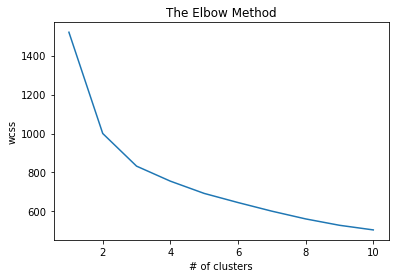

In [35]:
# n_clusters 찾기

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(transformer.transform(X))
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show()

### Step4: Train Model

In [36]:
# n_clusters=3, init='k-means++' 조건으로 Kmeans 학습
# y_kmeans에 predict한 결과 저장

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X_pp)

In [37]:
y_kmeans

array([2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0])

In [38]:
# centroid 확인

df_cluster = pd.DataFrame(transformer.inverse_transform(kmeans.cluster_centers_),  #inverse_transform
                          columns = df.columns)
df_cluster

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
0,331.275362,525.797101,2029.600000,1033.115362,82.247913,38.465217,15.213768,1.997561e+01,0.0,104.900219,0.893526
1,339.921875,160.546875,2119.491250,1100.340938,95.030656,53.027344,20.239062,2.065198e+01,0.0,121.948687,0.938809
2,341.578947,163.157895,2052.061053,74.000000,90.585789,51.097368,19.713158,-3.552714e-15,0.0,121.801053,0.954247


### Step5: Analyze Result

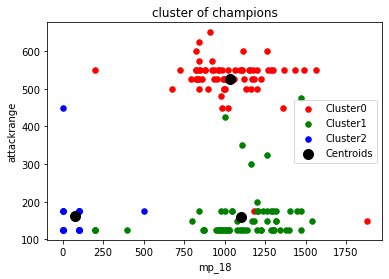

In [42]:
x_axis = 'mp_18'
y_axis = 'attackrange'

plt.scatter(df.loc[y_kmeans==0, x_axis], df.loc[y_kmeans==0, y_axis], s=30, c='r', label='Cluster0')
plt.scatter(df.loc[y_kmeans==1, x_axis], df.loc[y_kmeans==1, y_axis], s=30, c='g', label='Cluster1')
plt.scatter(df.loc[y_kmeans==2, x_axis], df.loc[y_kmeans==2, y_axis], s=30, c='b', label='Cluster2')
# plt.scatter(df.loc[y_kmeans==3, x_axis], df.loc[y_kmeans==3, y_axis], s=30, c='c', label='Cluster3')
# plt.scatter(df.loc[y_kmeans==4, x_axis], df.loc[y_kmeans==4, y_axis], s=30, c='y', label='Cluster4')
plt.scatter(df_cluster.loc[:,x_axis], df_cluster.loc[:,y_axis], s=100, c='black', label='Centroids')


plt.title('cluster of champions')
plt.legend()
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()


In [43]:
# 최초 데이터 df에 y_kmeans 결과 추가

df_result = df.copy()
df_result['cluster'] = y_kmeans
df_result.head()

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18,cluster
id,,,,,,,,,,,,
Aatrox,345,175,2110.0,0.0,93.25,53.35,20.00,0.000,0,145.00,0.9277,2
Ahri,330,550,2090.0,843.0,80.38,38.50,15.70,21.600,0,104.04,0.8951,0
Akali,345,125,2190.0,200.0,82.50,58.25,16.50,50.000,0,118.50,0.9650,1
Alistar,330,125,2402.0,1030.0,103.50,53.35,22.95,22.100,0,125.75,0.8508,1
Amumu,335,125,1975.0,1305.0,94.60,53.35,23.45,16.307,0,117.98,1.0088,1


In [44]:
# cluster 확인
df_cluster

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
0,331.275362,525.797101,2029.600000,1033.115362,82.247913,38.465217,15.213768,1.997561e+01,0.0,104.900219,0.893526
1,339.921875,160.546875,2119.491250,1100.340938,95.030656,53.027344,20.239062,2.065198e+01,0.0,121.948687,0.938809
2,341.578947,163.157895,2052.061053,74.000000,90.585789,51.097368,19.713158,-3.552714e-15,0.0,121.801053,0.954247


In [45]:
# cluster별 해석

# 0: 원거리 챔피언
df_result[df_result.cluster==0]

# 1: 근거리 챔피언, MP 존재
# df_result[df_result.cluster==1]

# 2: 근거리 챔피언, MP 미존재
# df_result[df_result.cluster==2]

,movespeed,attackrange,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18,cluster
id,,,,,,,,,,,,
Ahri,330,550,2090.0,843.0,80.380,38.5,15.70,21.600,0,104.040,0.8951,0
Anivia,325,600,1874.0,1260.0,89.220,38.5,14.85,21.600,0,105.776,0.8035,0
Annie,335,625,2020.0,843.0,87.220,38.5,14.85,21.600,0,95.035,0.7129,0
Aphelios,325,550,2026.0,1062.0,79.000,34.5,12.60,13.300,0,97.800,0.8685,0
Ashe,325,600,2049.0,824.0,83.800,38.5,12.85,13.772,0,109.320,1.0305,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Yuumi,330,500,1670.0,1165.0,76.000,30.1,16.35,16.800,0,107.700,0.7312,0
Ziggs,325,550,2100.0,879.5,77.644,38.5,16.70,21.600,0,106.908,0.8790,0
Zilean,335,550,1898.0,1302.0,88.600,38.5,14.00,24.935,0,102.640,0.8513,0
